# <div align="center"><b> Проект: Анализ сервиса аренды самокатов  </b></div>

**Описание:**  
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.  
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:  
- **без подписки**
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;  
- **с подпиской Ultra**
   - абонентская плата — 199 рублей в месяц;
   - стоимость одной минуты поездки — 6 рублей;
   - стоимость старта — бесплатно.

**Выполнение проекта планирую в несколько этапов:**

- Загрузка данных
- Предобработка данных
- Исследовательский анализ данных
- Объединение данных
- Подсчет выручки
- Проверка гипотез
- Общий вывод

***Импортируем необходимые библиотеки***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#### Шаг 1. Загрузка данных

#####  Загружаем датасеты, и выводим первые строки на экран

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
display(users.head(), rides.head(), subscriptions.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


##### Получим общую информацию о данных

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [5]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


***Количество значений в столбцах одинаковое, значит нет пропущенных значений, дальше еще проверим. Наименования столбцов корректны,столбец 'date' переведем к типу данных pandas.***

#### Шаг 2. Предобработка данных

##### Приведем столбец 'date' к типу даты pandas

In [6]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides['date'].head(10)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
5   2021-10-09
6   2021-10-19
7   2021-11-06
8   2021-11-14
9   2021-11-22
Name: date, dtype: datetime64[ns]

In [7]:
rides['date'].dt.year.unique() #проверим за какой период предоставлены данные.

array([2021])

##### Создадим новый столбец с номером месяца 'month'

In [8]:
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


##### Проверяем наличие пропущенных значений и дубликатов.

In [9]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [11]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

***Пропущенные значения отсутствуют.***

In [12]:
users.duplicated().sum() 

31

In [13]:
users = users.drop_duplicates().reset_index(drop=True) # удаление явных дубликатов, создание новых индексов и удаление старых

In [14]:
users.duplicated().sum() #проверяем

0

In [15]:
rides.duplicated().sum() 

0

In [16]:
subscriptions.duplicated().sum() 

0

***Дубликаты были найдени только в таблице Пользователи(users_go) - их удалили, в остальных отсутствуют.***

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [17]:
users['city'].value_counts() #посмотрим количество пользователей по городам

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

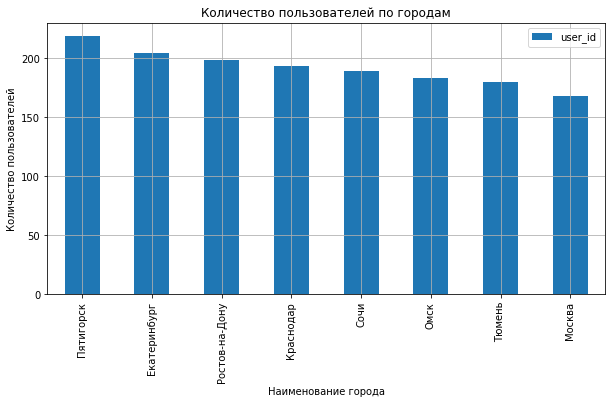

Количество пользователей по городам


,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


In [18]:
(users.pivot_table(index='city',
                   values='user_id', 
                   aggfunc='count')
 .sort_values(by='user_id', ascending=False)
    .plot(kind='bar',
          grid=True,
          figsize=(10, 5)))
plt.title('Количество пользователей по городам')
plt.xlabel('Наименование города')
plt.ylabel('Количество пользователей')
plt.show()
titl = 'Количество пользователей по городам'
print('\033[1m' + titl + '\033[1m')
users_pivot = (users
               .pivot_table(index='city',
                   values='user_id', 
                   aggfunc='count')
               .sort_values(by='user_id', ascending=False))
display(users_pivot)

***На первой позиции по пользователям город Пятигорск - 219 человек, затем Екатеринург - 204 человека, самое меньшее в Москве -  168 человек.***

##### Соотношение пользоватей с подпиской и без

In [19]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

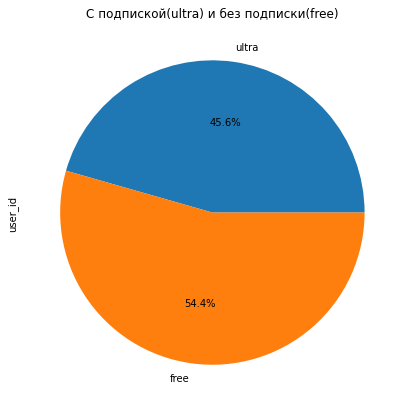

In [20]:
(users.pivot_table(index='subscription_type',
                   values='user_id', 
                   aggfunc='count')
 .sort_values(by='user_id', ascending=True)
    .plot(kind='pie',
          subplots=True, 
          autopct='%1.1f%%', 
          legend=False,
          figsize=(7, 7)))
plt.title('С подпиской(ultra) и без подписки(free)')
plt.show()

***Большая часть пользователей с бесплатной подпиской - 835 человек, это 54.4% от общего количества. На платной подписке 699 пользователей - 45.6%.***

##### Возраст пользователей

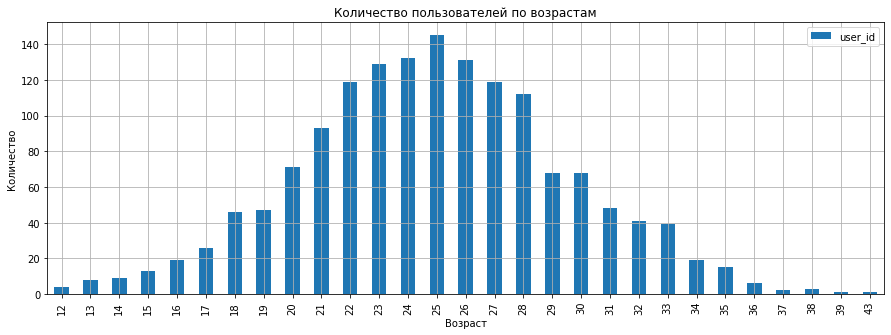

In [21]:
(users.pivot_table(index='age',
                   values='user_id',
                   aggfunc='count')
 .sort_values(by='age', ascending=True)
    .plot(kind='bar' , grid=True, figsize=(15, 5)))
plt.title('Количество пользователей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

***В среднем преобладает количество пользователей от 20 до 30лет. Больше всего человек в возрасте 25 лет. Самые малдшие пользователи - 12 лет, а старшие - 43 года.***

##### Расстояние, которое пользователь преодолел за одну поезду

In [22]:
rides['distance'] = round(rides['distance'],2) #округлим значения до 2х знаков 

In [23]:
rides.head() #выведем первые строки для проверки

,user_id,distance,duration,date,month
0,1,4409.92,25.599769,2021-01-01,1
1,1,2617.59,15.816871,2021-01-18,1
2,1,754.16,6.232113,2021-04-20,4
3,1,2694.78,18.511000,2021-08-11,8
4,1,4028.69,26.265803,2021-08-28,8


***Короткие дистанции за одну поезду по возрастанию***

In [24]:
rides['distance'].sort_values().head(10)

11555     0.86
9541      2.57
13690     4.33
8658      6.78
7841      7.10
8906     11.28
8324     12.23
13940    15.00
15626    15.37
11862    15.63
Name: distance, dtype: float64

***Длинные дистанции за одну поездку по возрастанию***

In [25]:
rides['distance'].sort_values(ascending=False).head(10)

16309    7211.01
16484    7066.00
15580    6908.49
17171    6760.94
17242    6724.93
10341    6671.97
11385    6601.20
12086    6538.94
10915    6535.39
11319    6503.60
Name: distance, dtype: float64

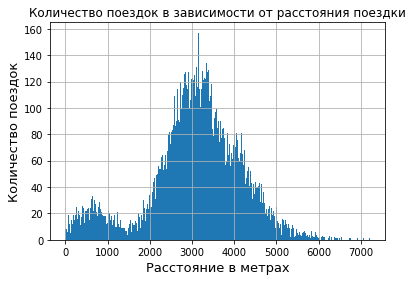

In [26]:
rides['distance'].plot(kind='hist',
                       bins=500,
                       title='Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах',size=13)
plt.ylabel('Количество поездок',size=13)
plt.grid()
plt.show()

***Большая часть поездок у пользователей от 2.5км до 4 км. Самая короткая дистанция - 860м, а самая длинная ~ 7.2км.***

##### Продолжительность поездок

In [27]:
rides['duration'] = np.ceil(rides['duration']) #округляем значения в столбце 'duration' по методу "потолок"
rides['duration'] = rides['duration'].astype(int) #переводим к целым числам
rides.head()

,user_id,distance,duration,date,month
0,1,4409.92,26,2021-01-01,1
1,1,2617.59,16,2021-01-18,1
2,1,754.16,7,2021-04-20,4
3,1,2694.78,19,2021-08-11,8
4,1,4028.69,27,2021-08-28,8


***Короткие поездки***

In [28]:
rides['duration'].sort_values().head(10)

6860     1
16704    1
10426    1
16336    1
6531     1
9282     1
15132    1
7437     1
9622     1
15771    1
Name: duration, dtype: int64

***Долгие поездки***

In [29]:
rides['duration'].sort_values(ascending=False).head(10)

4215    41
4709    40
2623    40
1998    39
6453    39
143     39
3729    38
499     37
5013    37
1894    37
Name: duration, dtype: int64

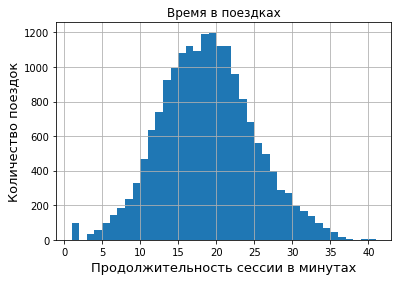

In [30]:
rides['duration'].plot(kind='hist',
                       bins=40,
                       title='Время в поездках')
plt.xlabel('Продолжительность сессии в минутах',size=13)
plt.ylabel('Количество поездок',size=13)
plt.grid()
plt.show()

***Основное время в поездках у пользователей занимает от 10 до 25 минут. Самая короткая поездка ~ 1 минута, долгая - 41 минуту.***

#### Шаг 4. Объединение данных

##### Объединение данных о пользователях, поездках и подписках

In [31]:
data = users.merge(rides, on='user_id',how='outer') #объединяем таблицу users и rides по столбцу user_id
data_go = data.merge(subscriptions, on='subscription_type',how='outer') #объединяем по столбцу 'subscription_type'
data_go

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,17,2021-11-27,11,8,50,0


In [32]:
data_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

***Размер таблицы получился (18068 строк и 12 столбцов). Изначально в таблице 'users' было (1565 строк и 5 столбцов), в таблице 'rides' (18068 строк и 4 столбца) и в 'subscriptions' (2 строки и 4 столбца) - при объединении ничего не потерялось.  
Пропущенные значения в таблицы отсутствуют***

##### Создаем 2 датафрейма, пользователи с подпиской и без

In [33]:
free_go = data_go.query('subscription_type == "free"') #создаем датафрейм с бесплатной подпиской
free_go

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,17,2021-11-27,11,8,50,0


In [34]:
ultra_go = data_go.query('subscription_type == "ultra"') #создаем датафрейм с платной подпиской
ultra_go

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.05,25,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.70,16,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.16,15,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.85,16,2021-10-17,10,6,0,199


##### Визуализируем информацию о расстоянии и времени в поездках для разных категорий подписок

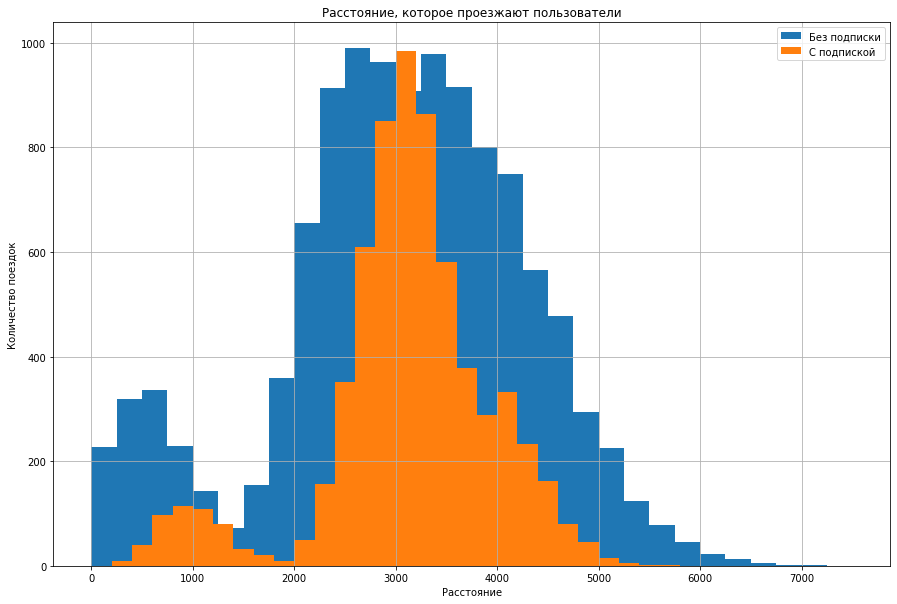

In [35]:
(free_go['distance']
 .plot(kind='hist',
       bins=30,
       figsize=(15,10),
       grid=True,
       title='Расстояние, бесплатная подписка',
       range=(0,7500)))
(ultra_go['distance']
 .plot(kind='hist',
       bins=30,
       figsize=(15,10),
       grid=True,
       title='Расстояние, которое проезжают пользователи',
       range=(0,6000)))
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.legend(['Без подписки', 'С подпиской'])
plt.show()

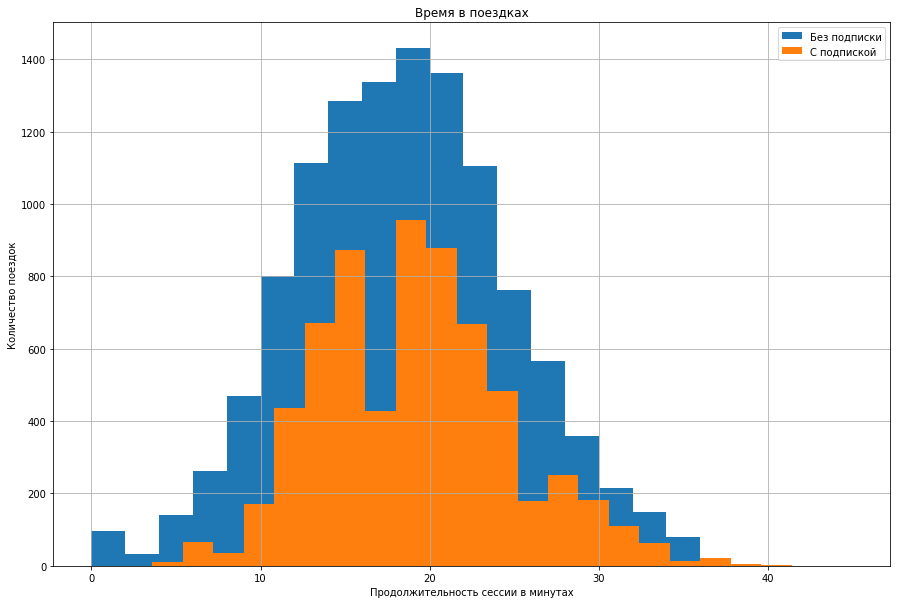

In [36]:
(free_go['duration']
 .plot(kind='hist',
       bins=20,
       figsize=(15,10),
       grid=True,
       title='Время в поездках, бесплатная подписка',
       range=(0,40)))
(ultra_go['duration']
 .plot(kind='hist',
       grid=True,
       bins=25,
       figsize=(15,10),
       title='Время в поездках',
       range=(0,45)))
plt.xlabel('Продолжительность сессии в минутах')
plt.ylabel('Количество поездок')
plt.legend(['Без подписки','С подпиской'])
plt.show()

***Пользователи с бесплатной подпиской проезжают расстояние от 2 до 5 км и тратят времени на поездки от 10 до 30 минут. С платной подпиской пользователи больше всего проезжают расстояние в 3 км, а времени трятят на поездки от 10 до 25 минут.***  
***Получается пользователи с бесплатной подпиской проезжают более длинные дистанции до 5 км, по продожительности времени в поездках примерно одинаково, но с бесплатной подпиской бывают тратят около 30 минут времени на поездку, это скорей всего при проезде дистанции в 5 км.***

#### Шаг 5. Подсчёт выручки

##### Найдем суммарное расстояние, кол-во поездок и суммарное время для каждого пользователя за месяц

In [37]:
pivot_go = (data_go
    .pivot_table(
        index=('user_id','month'), 
        values=('name',
                'distance',
                'duration',
                'subscription_type', 
                'start_ride_price', 
                'minute_price', 
                'subscription_fee'),
        aggfunc={'name':len,
                 'distance':sum,
                 'duration':sum,
                 'subscription_type':min,
                 'start_ride_price':'mean',
                 'minute_price':'mean',
                 'subscription_fee':'mean'}
                 )
    .rename(columns={'name': 'number_trips'}
           ))
pivot_go

distance  duration  minute_price  number_trips  \
user_id month                                                   
1       1       7027.51        42             6             2   
        4        754.16         7             6             1   
        8       6723.47        46             6             2   
        10      5809.91        32             6             2   
        11      7003.50        56             6             3   
...                 ...       ...           ...           ...   
1534    6       3409.47        26             8             2   
        8       7622.45        48             8             2   
        9       4928.17        23             8             1   
        11     13350.02        78             8             4   
        12      2371.71        16             8             1   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1       1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra  
...                         ...               ...               ...  
1534    6                    50                 0              free  
        8                    50                 0              free  
        9                    50                 0              free  
        11                   50                 0              free  
        12                   50                 0              free  

[11331 rows x 7 columns]

##### Добавим столбец с помесячной выручкой, которую принес каждый пользователь

In [38]:
pivot_go['revenue_month'] = (pivot_go['start_ride_price']*pivot_go['number_trips']
   + pivot_go['minute_price']*pivot_go['duration'] + pivot_go['subscription_fee'])
pivot_go

distance  duration  minute_price  number_trips  \
user_id month                                                   
1       1       7027.51        42             6             2   
        4        754.16         7             6             1   
        8       6723.47        46             6             2   
        10      5809.91        32             6             2   
        11      7003.50        56             6             3   
...                 ...       ...           ...           ...   
1534    6       3409.47        26             8             2   
        8       7622.45        48             8             2   
        9       4928.17        23             8             1   
        11     13350.02        78             8             4   
        12      2371.71        16             8             1   

               start_ride_price  subscription_fee subscription_type  \
user_id month                                                         
1       1                     0               199             ultra   
        4                     0               199             ultra   
        8                     0               199             ultra   
        10                    0               199             ultra   
        11                    0               199             ultra   
...                         ...               ...               ...   
1534    6                    50                 0              free   
        8                    50                 0              free   
        9                    50                 0              free   
        11                   50                 0              free   
        12                   50                 0              free   

               revenue_month  
user_id month                 
1       1                451  
        4                241  
        8                475  
        10               391  
        11               535  
...                      ...  
1534    6                308  
        8                484  
        9                234  
        11               824  
        12               178  

[11331 rows x 8 columns]

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи  с подпиской больше времени на поездки?

Нужно проверить гипотезу: 
- пользователи с подпиской трятят больше времени на поездки, чем без подписки  
  
H0 - Средняя продолжительность поездок с подпиской = Средней продолжительности поездок без подписки  
H1 - Средняя продолжительность поездок с подпиской > Средней продолжительности поездок без подписки
  
уровень значимости 5%

In [39]:
ultra = ultra_go['duration']
free = free_go['duration']
alpha = .05
results = st.ttest_ind(ultra, 
           free,
           equal_var=True, 
           alternative='greater')
print('Р-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Р-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


***Нулевая гипотеза отвергнута, можем предполагать, что время в поездках пользователей с подпиской больше, чем продолжительность поездок у пользователей без подписки.***

##### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метра?

Расстояние одной поездки в 3130 метров - оптимальное с точки зрения износа самоката.
Проверяем гипотезу: 
- Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метра?    

H0 - Среднее расстояние поездок = 3130 метра  
H1 - Среднее расстояние поездок > 3130 метров  
  
уровень значимости 5%


In [40]:
ultra = ultra_go['distance']
dist = 3130
alpha = .05
results = st.ttest_1samp(ultra, 
                        dist,
                        alternative='greater')
print('Р-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Р-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


***Нулевую гипотезу отвергнуть не удалось, значить можем предполагать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поезду, не превышает 3130 метров.***

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка у пользователей без подписки?

***Проверяем гипотезу: будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка у пользователей без подписки?***  
  
H0 - Помесячная выручка пользователей с подпиской = Помесячная выручка пользователей без подписки  
H1 - Помесячная выручка пользователей с подпиской > Помесячная выручка пользователей без подписки
  
уровень значимости 5%  

In [41]:
ultra = pivot_go.loc[pivot_go['subscription_type']=='ultra', 'revenue_month']
free = pivot_go.loc[pivot_go['subscription_type']=='free', 'revenue_month']
alpha = .05
results = st.ttest_ind(ultra, 
           free,
           equal_var=True, 
           alternative='greater')
print('Р-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Р-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


***Нулевую гипотезу отвергнули, значит можем предполагать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем у пользователей без подписки.***

##### Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до  обновлений и после него. Какой тест понадобится для проверки гипотезы?

***Дла проверки гипотезы:*** нужно использовать гипотезу о равенстве средних для зависимости(парных) выборок и применять метод:  **scipy.stats.ttest_rel**
  
H0 - u1 = u2  
H1 - u1 > u2  
u1 и u2 - средние значения до и после изменения.

#### Шаг 7. Общий вывод

***Исходя из общего анализа мы видим:***  
*1. На первой позиции по пользователям город Пятигорск - 219 человек, затем Екатеринург - 204 человека, самое меньшее в Москве - 168 человек.*  
*2. Большая часть пользователей с бесплатной подпиской - 835 человек, это 54.4% от общего количества. На платной подписке 699 пользователей - 45.6%.*  
*3. В среднем преобладает количество пользователей от 20 до 30лет. Больше всего человек в возрасте 25 лет. Самые малдшие пользователи - 12 лет, а старшие - 43 года.*  
*4. Основная дистанция у пользователей составляет от 2.5км до 4 км. Самая короткая дистанция - 860м, а самая длинная ~ 7.2км.*   
*5. Основное время в поездках у пользователей занимает от 10 до 25 минут. Самая короткая поездка ~ 1 минута, долгая - 41 минуту.*  
*6. Пользователи с бесплатной подпиской проезжают расстояние от 2 до 5 км и тратят времени на поездки от 10 до 30 минут. С платной подпиской пользователи больше всего проезжают расстояние в 3 км, а времени трятят на поездки от 10 до 25 минут.*    
***Также проверили нектороые гипотезы:***  
*1. Можем предполагать, что время в поездках пользователей с подпиской больше, чем продолжительность поездок у пользователей без подписки.*  
*2. Можем предполагать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поезду, не превышает 3130 метров.*  
*3. Можем предполагать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем у пользователей без подписки.*    
  
***Пользователи с подпиской являются более выгодными для компании, поэтому компании нужно принять меры для увеличения клиентов на платном тарифе.***